<a href="https://colab.research.google.com/github/bongkyunSON/Deep_Leaning/blob/main/DL_221130.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### tf.keras Practice!

- CIFAR10 이미지 데이터셋을 분류하는 문제를 풀어봅니다!

In [ ]:
# import os
# os.cpu_count()
!nvidia-smi

Wed Nov 30 08:05:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
import numpy as np
tf.__version__

'2.9.2'

In [ ]:
# Import Libraries
import numpy as np
import tensorflow as tf

# import tensorflow layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [ ]:
# Load Datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape) # 4차원 Tensor
## 32 x 32 x 3(RGB-channel) -> 이미지당 pixel 개수.
print(X_test.shape)


# RGB (3-channel)
# 32 x 32 - R -> pixel matrix
# 32 x 32 - G
# 32 x 32 - B

"""

1차원은 백터
2차원은 메트릭
3차원 이상은 텐서

"""

170498071/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


'\n\n1차원은 백터\n2차원은 메트릭\n3차원 이상은 텐서\n\n'

### Preprocessing

Input Normalization

In [ ]:
# min-max scaling
# RGB, 3-channel color [0, 255] 24bit True color
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

### Training with Vanilla CNN

**Model Architecture**

> Conv - Relu - Conv - Relu - FC - FC


In [ ]:
# Sequential 객체를 이용하여 layer를 쌓아올려 모델을 만듭니다.
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(filters=6,
           kernel_size=3,
           strides=1,
           padding='same',
           activation='relu'),
    Conv2D(16, 5, 1, 'same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')

    
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 6)         168       
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 4096)              0         
                                                                 
 dense_15 (Dense)            (None, 1024)              4195328   
                                                                 
 dense_16 (Dense)            (None, 128)               131200    
                                                      

In [ ]:
# training setup
from tensorflow.keras.optimizers import SGD, Adam

## config variables
batch_size = 128
lr = 1e-3
epochs = 30

# Set optimizer, loss function, metrics, callback function
optimizer = Adam(learning_rate=lr)

# categorical_crossentropy : target value가 이미 one-hot vector인 경우
# sparse_categorical_crossentropy : 그냥 정수

loss_fn = 'sparse_categorical_crossentropy' # multi-class classification
metrics = ['accuracy']

model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=metrics)

In [ ]:
# model training

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test), # 매 epoch마다 validation 성능 체크 가능!
                    verbose=2)

Epoch 1/30
391/391 - 3s - loss: 1.5259 - accuracy: 0.4481 - val_loss: 1.2324 - val_accuracy: 0.5596 - 3s/epoch - 9ms/step
Epoch 2/30
391/391 - 3s - loss: 1.1331 - accuracy: 0.5986 - val_loss: 1.0891 - val_accuracy: 0.6176 - 3s/epoch - 7ms/step
Epoch 3/30
391/391 - 3s - loss: 0.9549 - accuracy: 0.6612 - val_loss: 1.0203 - val_accuracy: 0.6438 - 3s/epoch - 7ms/step
Epoch 4/30
391/391 - 3s - loss: 0.8126 - accuracy: 0.7143 - val_loss: 0.9776 - val_accuracy: 0.6616 - 3s/epoch - 7ms/step
Epoch 5/30
391/391 - 3s - loss: 0.6727 - accuracy: 0.7639 - val_loss: 0.9606 - val_accuracy: 0.6723 - 3s/epoch - 7ms/step
Epoch 6/30
391/391 - 3s - loss: 0.5310 - accuracy: 0.8142 - val_loss: 0.9947 - val_accuracy: 0.6742 - 3s/epoch - 7ms/step
Epoch 7/30
391/391 - 3s - loss: 0.3867 - accuracy: 0.8675 - val_loss: 1.0612 - val_accuracy: 0.6756 - 3s/epoch - 7ms/step
Epoch 8/30
391/391 - 3s - loss: 0.2638 - accuracy: 0.9102 - val_loss: 1.2059 - val_accuracy: 0.6687 - 3s/epoch - 7ms/step
Epoch 9/30
391/391 - 3s 

In [ ]:
# evaluate
loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print("Loss : %.4f, Accuracy : %.4f" % (loss, acc))

79/79 [==============================] - 0s 4ms/step - loss: 2.9238 - accuracy: 0.6600
Loss : 2.9238, Accuracy : 0.6600


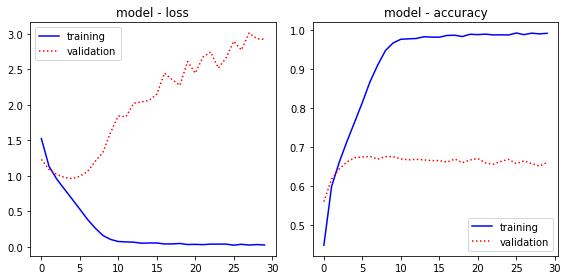

In [ ]:
## loss visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.subplot(1, 2,1)
plt.plot(history.history['loss'],'b-', label = "training")
plt.plot(history.history['val_loss'], 'r:', label = "validation")
plt.title("model - loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("model - accuracy")

plt.plot(history.history['accuracy'], 'b-', label = "training")
plt.plot(history.history['val_accuracy'], 'r:', label = "validation")

plt.legend()
plt.tight_layout()
plt.show()

### Model Training

1. model architecture

- Hidden Layer (뒤로 갈수록 hidden node수가 작아짐)

- Activation function : 'sigmoid' / 'relu'



2. loss optimization


- optimizer : 'sgd', 'momentum', 'adam'

- batch_size : 1 -> 8-> 32 -> 64 -> 128 -> 256 -> 512 -> 2048 -> ...

- epochs : 10 -> 30 -> 100 -> 10000 (overfitting) 

In [ ]:
(3072+1)*1024

3146752

In [ ]:
model = Sequential([
    Input(shape=(32, 32, 3)),
    Flatten(),   # 32x32x3 ----> 3072 (input layer의 node 수)
    Dense(units=1024, activation='relu'),
    Dense(units=256, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')  # output layer
])


model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 3072)              0         
                                                                 
 dense_28 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_29 (Dense)            (None, 256)               262400    
                                                                 
 dense_30 (Dense)            (None, 128)               32896     
                                                                 
 dense_31 (Dense)            (None, 10)                1290      
                                                                 
Total params: 3,443,338
Trainable params: 3,443,338
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train # 0 ~ 9

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
# compile
from tensorflow.keras.optimizers import SGD, Adam

lr = 1e-4
epochs = 200
batch_size = 128

# 모든데이터가 학습에 다 사용되면 1 epoch
# epochs : 전체 데이터를 몇번 반복 학습을 수행한건지.
# iterations : 실제로 weghit update를 한 횟수.


loss_fn = 'sparse_categorical_crossentropy'  #target vector가 정수인 경우.
# optimizer = SGD(learning_rate=lr) #learning rate 조절을 위해서 보통 함수로 구현.
# optimizer = SGD(learning_rate=lr, momentum=0.9)
optimizer = Adam(learning_rate=lr)


model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy']
              )

In [ ]:
# fit
model.fit(x=X_train,
          y=y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, y_test))


Epoch 1/200
391/391 - 2s - loss: 11.5867 - accuracy: 0.2440 - val_loss: 4.8217 - val_accuracy: 0.2771 - 2s/epoch - 5ms/step
Epoch 2/200
391/391 - 1s - loss: 4.4090 - accuracy: 0.2928 - val_loss: 3.7697 - val_accuracy: 0.3124 - 1s/epoch - 3ms/step
Epoch 3/200
391/391 - 1s - loss: 3.5582 - accuracy: 0.3185 - val_loss: 4.8723 - val_accuracy: 0.2506 - 1s/epoch - 3ms/step
Epoch 4/200
391/391 - 1s - loss: 3.0897 - accuracy: 0.3375 - val_loss: 2.9197 - val_accuracy: 0.3226 - 1s/epoch - 3ms/step
Epoch 5/200
391/391 - 1s - loss: 2.7835 - accuracy: 0.3523 - val_loss: 2.9289 - val_accuracy: 0.3179 - 1s/epoch - 3ms/step
Epoch 6/200
391/391 - 1s - loss: 2.5064 - accuracy: 0.3722 - val_loss: 2.4738 - val_accuracy: 0.3770 - 1s/epoch - 3ms/step
Epoch 7/200
391/391 - 1s - loss: 2.3281 - accuracy: 0.3862 - val_loss: 2.6446 - val_accuracy: 0.3600 - 1s/epoch - 3ms/step
Epoch 8/200
391/391 - 1s - loss: 2.1773 - accuracy: 0.4009 - val_loss: 2.6156 - val_accuracy: 0.3631 - 1s/epoch - 3ms/step
Epoch 9/200
391

In [ ]:
## 어떤 Hyper-parameter setting에서 최고의 성능이 나왔나요?
# evaluate

loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print("Loss : %4.f, Test Accuracy : %.4f" % (loss, acc))

79/79 [==============================] - 0s 3ms/step - loss: 4.3276 - accuracy: 0.4943
Loss :    4, Test Accuracy : 0.4943


In [ ]:
"""
오버핏팅이 되면 optimizer, batch_size를 바꾸고
언더핏팅이 되면 모델을 바꾸는게 효율적이다
"""